<a href="https://colab.research.google.com/github/alexbenanti/Breast-Cancer-Segmentation-Final-Project/blob/main/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import os.path
import math
import matplotlib.pyplot as plt

##Question 1(a)

To find the resulting vectors in $\mathbb{R}^k$ we first want to find the mean of our data $X$ (call it $\bar{X}$) and compute $\text{Cov}(X-\bar{X})$. From this covariance matrix, we find the eigenvalues and eigenvectors. Then, our first $k$ principal components will be the $k$ eigenvectors that correspond to the $k$ largest eigenvalues (in descending order). Call this subset of eigenvectors $\Lambda'_k$. Then, our reduced vectors in $\mathbb{R}^k$ will be:

$$X_{\text{reduced}} = \left(\left(\Lambda'_k\right)^T(X-\bar{X})^T\right)^T $$

##Question 1(b)

To do this, you can plot the singular values in a scree plot and, from this, notice each instance in which the slope changes. These instances indicate that the variance captured by each dimensions decreases. We should choose $k$ in accordance with how many of these "drastic elbows" we see (i.e. sharp changes). Once the elbows get closer to 180 degrees, though, that tells us that those further dimensions are probably not worth keeping in our reduced data matrix (given that the variance will be so little).

##Question 1(c)

Let $v_1$ be the first principal direction, then, the amount of saple variance in the first principal direcion is calculated by the following:

$$\text{Sample Variance of First Principal Direction} = \frac{v_1^T\left(X^TX\right)v_1}{n-1}$$

##Question 2(a)

For this problem, we first want to find $\bar{X}$ which contains the average values of each column and subtract it from $X$. Then, we find the covariance matrix of $X-\bar{X}$ and, from this, find the eigenvalues and eigenvectors of this covariance matrix. Then, the first principal component is the eigenvector that corresponds to the largest eigenvalue.

In [ ]:
#Question 2a
#find max eigenvector of the covariance matrix
X = np.array([[-1,-1], [1,-1],[-1,0],[1,0],[-1,1],[1,1]])

#center the data in the matrix X

X_bar = np.mean(X, axis=0)

X_twiddle = X-X_bar 
S = np.cov(X_twiddle, rowvar=False)
w,v = (np.linalg.eig(S))
max_eigenvalue_index = np.argmax(w)
w_1 = v[:,max_eigenvalue_index]


print('The first principal component is:',w_1)






The first principal component is: [1. 0.]


To put it more cleanly, our first principal component is $$\begin{bmatrix} 1 \\ 0 \end{bmatrix}$$

##Question 2(b)##

For this problem, we can use the following formula:

$$y = ax+b$$

where 

$$a = \frac{\sum_{i=0}^nx_iy_i - \frac{\sum_{i=0}^nx_i\sum_{i=0}^ny_i}{n}}{\sum_{i=0}^nx_i^2 - \frac{\sum_{i=0}^nx_i^2}{n}} $$

and 

$$b = \frac{\sum_{i=0}^ny_i - b\sum_{i=0}^nx_i}{n}$$

In [ ]:
#Question 2b
#compute linear regression formula y= ax+b

X = np.array([[-1,-1], [1,-1],[-1,0],[1,0],[-1,1],[1,1]])
a = 0 

def sum_of_xy(X):
  xy = 0
  for i in range(len(X)):
    xy+= X[i,0]*X[i,1]
  return xy

def average_of_invd_sums(X):
  x = 0
  y = 0
  for i in range(len(X)):
    x+=X[i,0]
    y+=X[i,1]
  avg = (x*y)/(len(X))
  return avg

xy = sum_of_xy(X)

avg_xy = average_of_invd_sums(X)

print(xy)
print(avg_xy)

#Since both of these values are 0, we know that the slope is 0. 



sum_of_ys = 0
#we dont need to sum our xs since we calculated the slope to be 0
for i in range(len(X)):
  sum_of_ys += X[i,1]

b = sum_of_ys/len(X)

print('Thus, our coefficients a and b are:', a,b)
  



0
0.0
Thus, our coefficients a and b are: 0 0.0


Thus, our "affine" function of $y$ in terms of $x$ is

$$y = 0x + 0$$

$$\Rightarrow y = 0$$

Thus, this function isn't really affine since it goes through the origin.

#Question 3(a)

We repeat the same process we did in the last question

In [ ]:
#Question 3a
#find max eigenvector of the covariance matrix
X = np.array([[-0.5,-1], [0.5,-1],[-0.5,0],[0.5,0],[-0.5,1],[0.5,1]])

#center the data in the matrix X

X_bar = np.mean(X, axis=0)


X_twiddle = X-X_bar 
S = np.cov(X_twiddle, rowvar=False)
w,v = (np.linalg.eig(S))
max_eigenvalue_index = np.argmax(w)
w_1 = v[:,max_eigenvalue_index]


#first_pc = np.matmul(X_twiddle.transpose(), w_1)

print('The first principal component is:',w_1)


The first principal component is: [0. 1.]


Thus, our first principal component is 

$$\begin{bmatrix}
0\\
1
\end{bmatrix}$$

##Question 3(b)

Again, we repeat the same process as the last question:

In [ ]:
#Question 3b
#compute linear regression formula y= ax+b

X = np.array([[-1,-1], [1,-1],[-1,0],[1,0],[-1,1],[1,1]])
a = 0 

def sum_of_xy(X):
  xy = 0
  for i in range(len(X)):
    xy+= X[i,0]*X[i,1]
  return xy

def average_of_invd_sums(X):
  x = 0
  y = 0
  for i in range(len(X)):
    x+=X[i,0]
    y+=X[i,1]
  avg = (x*y)/(len(X))
  return avg

xy = sum_of_xy(X)

avg_xy = average_of_invd_sums(X)

print(xy)
print(avg_xy)

#Since both of these values are 0, we know that the slope is 0. 



sum_of_ys = 0
#we dont need to sum our xs since we calculated the slope to be 0
for i in range(len(X)):
  sum_of_ys += X[i,1]

b = sum_of_ys/len(X)

print('Thus, our coefficients a and b are:', a,b)
  

0
0.0
Thus, our coefficients a and b are: 0 0.0


Therefore, again, our linear regression function is:

$$y = 0x + 0$$

$$\Rightarrow y = 0$$

##Question 4

The training error will never increase when we add a feature to the regression problem. While the training error might not increase, the test error almost certainly will because we have "overfit" the model.

The training error will increse, however, when we use Ridge regression since we have a penalty term. Recall that the ridge regression formula is given by the following:

$$R(\mathbf{x}) = ||A\mathbf{x} - \mathbf{b}||_2^2 + \delta^2||\mathbf{x}||_2^2$$

As our $\delta^2$ term increases, the model's complexity will decrease which, in turn, will result in a higher training error.

##Question 5(a)

The forecast of $A\hat{x}$ will NOT change since all of the terms that correspond to the scaled feature throughout the system get scaled equally.

##Question 5(b)

This will have an impact on ridge regression since the regularization term will deem the "lower-valued" coefficient as relatively unimportant and, in turn, change the results of the regression. (Ridge regression brings lower-valued coefficients closer to 0). 

##Question 6

We have $\hat{x} = A^+b$. Since we are operating under the ordinary least squares assumptions that $m>n$ and $A$ is full rank, we have the following simplification:

$$||\hat{\mathbf{x}} -\mathbf{x} || = ||A^{+}\mathbf{b} -\mathbf{x}||$$

$$= ||A^+(A\mathbf{x}-\mathbf{z})-\mathbf{z}||$$

$$=||A^+\mathbf{z}||$$

Now, from slide 12 of lecture 3, we have that 

$$\mathbf{u}_1 = \arg\max_{||\mathbf{u}||_2=1} ||A^T\mathbf{u}||_2$$

where $\mathbf{u}_1$ is the left singular vector corresponding to the largest singular value of $A$. Thus, the direction of $\mathbf{z}$ that produces the largest error $||\mathbf{x} - \hat{\mathbf{x}}||$ is $\mathbf{u}_1$. Therefore, this mens that the largest error will be defined as $||A^+\mathbf{u}_1||$. 

##Question 7

For this problem, we will first show that the two vectors, when multiplied by the new $A_c$ yield the same result. Given our definition of $A_c$ (we'll call it $A_c^*$ with the additional fourth column, we have the following:

$$A_c^* = \begin{bmatrix}
1 & a_1 & b_1 & b_1 \\
1& a_2 & b_2 & b_2 \\
\vdots & \vdots & \vdots & \vdots \\
1 & a_m & b_m & b_m   
\end{bmatrix}$$

It is sufficient to show that the first row of $A_c^*$ times the vectors a and b yields identical results:

$\underline{(a)}$

$$\begin{bmatrix}
1 & a_1 & b_1 & b_1
\end{bmatrix}\begin{bmatrix}
1.98 \\
2.09 \\
.20 \\
.88
\end{bmatrix} = 1.98 + 2.09a_1 + .20b_1 + .88b_1 = 1.98 + 2.09a_1 + 1.08b_1$$

$\underline{(b)}$

$$\begin{bmatrix}
1 & a_1 & b_1 & b_1
\end{bmatrix}\begin{bmatrix}
1.98 \\
2.09 \\
.54 \\
.54
\end{bmatrix} = 1.98 + 2.09a_1 + .54b_1 + .54b_1 = 1.98 + 2.09a_1 + 1.08b_1$$

We can can see that, for every row of $A_c^*$ (call it $A_{c_i}^*$), we will have $A_{c_i}^*\mathbf{x} = A_{c_i}^*\mathbf{y}$ if the last two elements of $\mathbf{x}$ and $\mathbf{y}$ sum to the same number. It just so happens that our vectors described in (a) and (b) meet this requirement. Thus, for both vectors, the value of $||A_c^*\mathbf{x}-\mathbf{b}||_2^2$ will be the same. Thus, in order to find $$\hat{\mathbf{x}} = \arg \min_\mathbf{x} ||A_c^*\mathbf{x} - \mathbf{b}||_2^2|| + \lambda ||\mathbf{x}||^2$$ between the two vectors, we simply have to find which norm is the smallest of the two. For notation purposes, we will call the vector denoted in (a) as $\mathbf{a}$ and (b) as $\mathbf{b}$:

$$||\mathbf{a}||^2 = (1.98)^2 + (2.09)^2 + (0.2)^2 + (0.88)^2 = 9.1029$$

$$||\mathbf{b}||^2 = (1.98)^2 + (2.09)^2 + (0.54)^2 + (0.54)^2 =8.8717$$

Since $||\mathbf{b}||^2 < ||\mathbf{a}||^2$, we can conclude that the vector in choice (b) will be more likely to occur than the other. 

##Question 8(a)

We can see from the singular value decomposition, that $\sigma_1 = 40$, $\mathbf{u}_1 = \begin{bmatrix}
-0.4 \\
-0.4 \\
0.4 \\
0.4 \\
0.4 \\
-0.4
\end{bmatrix}$ and $\mathbf{v}_1^T = \begin{bmatrix} 
0.5 & 0.5 & -0.5 & -0.5
\end{bmatrix}$.

With these defined we can now compute $\mathbf{u}_1\sigma_1\mathbf{v}_1^T$:

$$\mathbf{u}_1\sigma_1\mathbf{v}_1^T = \sigma_1\mathbf{u}_1\mathbf{v}_1^T$$

$$= 40\begin{bmatrix}
-0.4 \\
-0.4 \\
0.4 \\
0.4 \\
0.4 \\
-0.4
\end{bmatrix} \begin{bmatrix} 
0.5 & 0.5 & -0.5 & -0.5
\end{bmatrix}$$

$$=40\begin{bmatrix}
-0.2 & -0.2 & 0.2 & 0.2 \\
-0.2 & -0.2 & 0.2 & 0.2 \\
0.2 & 0.2 & -0.2 & -0.2 \\
0.2 & 0.2 & -0.2 & -0.2 \\
0.2 & 0.2 & -0.2 & -0.2 \\ 
-0.2 & -0.2 & 0.2 & 0.2
\end{bmatrix}$$

$$= \begin{bmatrix}
-8 & -8 & 8 & 8 \\
-8 & -8 & 8 & 8 \\
8 & 8 & -8 & -8 \\
8 & 8 & -8 & -8 \\
8 & 8 & -8 & -8 \\ 
-8 & -8 & 8 & 8
\end{bmatrix}$$

Therefore, the above matrix is the rank-1 approximation. 

##Question 8(b)

The low rank model helps us interpret what genre of movies people enjoy. Our matrix A was divided into the genres of super-hero movies and romance movies. We can interpret the rows of our rank-1 approximation as the movies corresponding to $A$ and the columns are the people corresponding to $A$. We can see that Bob and Molly have all negative entries for super-hero movies while Mary and Larry have positive entries for super-hero movies (the opposite is true for romance movies). Thus, the rank-1 approximation helps us see the trends of which types of movies people like or dislike in a clear and generalized manner. 

##Question 8(c)

For an initial value to impute for ? we can find the mean of all of Molly's known ratings and round it to the nearest integer. In this case, that would be $-1$. So, we have the new vector we will call $x$:

$$x = \begin{bmatrix}
-10 \\
-1 \\
8 \\
10
\end{bmatrix}$$
So, we can project it onto the vector $v_1^T$ to get the following:

$$\text{proj}_{v_1^T}(x) = \frac{v_1^T\cdot x}{||v_1^T||^2}v_1^T$$

$$\Rightarrow \text{proj}_{v_1^T}(x) = -14.5v_1^T$$

$$\Rightarrow \text{proj}_{v_1^T}(x) = \begin{bmatrix}
-7.25 \\
-7.25 \\
7.25 \\
7.25
\end{bmatrix}$$

We can now extract the second element of this vector as it corresponds to Molly and round it to the nearest integer and make this our imputed value in the new vector for X-Men 7. Therefore, the new estimate of Molly's rating is $-7$ and, so, I predict that she will not enjoy the movie. 



##Question 8(d)

Right now, for any rating $x$, we have the following:

$$-10\leq x \leq 10$$

Performing simply algebra, we have the following:

$$0\leq x+10 \leq 20$$

$$\Rightarrow 0\leq \frac{x+10}{2} \leq 10$$

Thus, for every rating $x$, we will add 10 to it and divide that by 2. I.e., our new ratings $y_{ij}$ between 0 and 10 will be determined by the following formula:

$$y_{ij} = \frac{x_{ij} + 10}{2}$$

##Question 9(a)

In [2]:
#Question 9a
from __future__ import print_function
import pandas as pd


"""
Loads financial data as a pandas dataframe
"""
def load_dataframe(filename) :
    return pd.read_csv(filename,index_col=0)

"""
Loads financial data as a tuple: names,data.  
names is a list of the stock names represented in each column.
data is a 2d numpy array.  Each row of data corresponds to a trading day.
data[i,j] is the price (technically the adjusted closing price) of 
instrument names[j] on the ith day.  The days are ordered chronologically.
"""
def load_data(filename) :
    df = pd.read_csv(filename,index_col=0)
    names = df.columns.values.tolist()
    data = df.values
    return names,data

"""
Given a 1d numpy array vec of n values, and a list of n names,
prints the values and their associated names.
"""
def pretty_print(vec,names) :
    print(pd.DataFrame(vec,names,['']).transpose())

"""
Given a 1d numpy array vec of n values, and a list of n names,
prints the values and their associated names in a LaTeX friendly
format.
"""
def pretty_print_latex(vec,names,num_col=6) :
    print("\\begin{center}")
    print("\\begin{tabular}{c"+("|c"*(num_col-1))+"}")
    for i in range(0,len(names),num_col) :
        start = True
        for j in range(i,min(i+num_col,len(names))) :
            if not start :
                print(" & ",end='')
            start = False
            print(names[j],end='')
        print("\\\\")
        start = True
        for j in range(i,min(i+num_col,len(names))) :
            if not start :
                print(" & ",end='')
            start = False
            print("%.04f"%vec[j],end='')
        print("\\\\")
        if i+num_col < len(names) :
            print("\\hline")
    print("\\end{tabular}")
    print("\\end{center}")

def main() :
    names,data = load_data('stockprices.csv')
    print("# of stocks = %d, # of days = %d"%(data.shape[1],data.shape[0]))
    pretty_print(data[0,:],names)
    #pretty_print_latex(data[0,:],names)

if __name__ == "__main__": 
    main()




# of stocks = 18, # of days = 433
        aapl       amzn       msft        goog        xom        apc  \
  101.790649  636.98999  52.433533  741.840027  72.740799  48.801582   

        cvx          c          gs       jpm         aet        jnj  \
  82.577927  50.149845  172.800156  61.18005  107.291946  95.826782   

        dgx         spy        xlf        sso   sds    uso  
  68.369064  194.027725  14.100877  60.724442  82.0  10.98  


In [ ]:
names, data = load_data('stockprices.csv')

R = np.zeros((432,18))
for i in range(len(R)):
  R[i,:] = data[i+1,:] - data[i,:]



pca = PCA(n_components=2)
pca.fit(R)

absolute_pc = abs(pca.components_)

first = np.argsort(absolute_pc[0])
second = np.argsort(absolute_pc[1])

largest_indicies_first = first[-2:]
largest_indicies_second = second[-2:]

print(largest_indicies_first)
print()
print(largest_indicies_second)

[3 1]

[1 3]


From the code, I found the largest coefficients in absolute value of the first two principal directions are located at the indicies 1 and 3 which correspond to Amazon and Google respectively. I suspect that this is due to how much larger Amazon and Google have grown over the past 433 days as opposed to the other stocks. Additionally, at each day, both of their stock values are much larger than the other stocks in comparison. 

##Question 9(b)

In [30]:
#df = pd.read_csv('stockprices.csv',index_col=0)


#df_new = (df-df.mean())/df.std()


#names = df_new.columns.values.tolist()
#data = df_new.values

names, data = load_data('stockprices.csv')





R = np.zeros((432,18))
for i in range(len(R)):
  R[i,:] = data[i+1,:] - data[i,:]

R_centered =  np.zeros((432,18))
for i in range(len(R[0])):
  R_centered[:,i] = (R[:,i] - R[:,i].mean())
  R_centered[:,i] = R_centered[:,i]/R_centered[:,i].std()



pca1 = PCA(n_components=2)
pca1.fit(R_centered)

absolute_pc = abs(pca1.components_)

first = np.argsort(absolute_pc[0])
second = np.argsort(absolute_pc[1])

largest_indicies_first = first[-2:]
largest_indicies_second = second[-2:]

print(largest_indicies_first)
print()
print(largest_indicies_second)



[15 13]

[17  3]


Now that we standardized the data, we are able to remove any bias from our data that stems for scaling. We can notice in the original data that the Google and Amazon stocks have much higher stock values per day, which, falsely, makes PCA assume that these are the stocks contributing to the maximal amount of variance. When we standardize the data, though, this bias is lost. From the first principal direction of our newly standardized data, we have that the two largest components are indexed at 13 and 15, this means that the two most influential stocks in the first principal direction of the standardized data matrix were SPY and SSO. These are both directly correlated to the S&P 500, which tells me that, over the past 433 days there must have been some major change in the S&P 500 that contributed to the maximal variance of the data. 

In terms of the second principal direction, the two largest components are 3 and 17. This means that the two most influential stocks in this direction are Google and USO. Thus, these stocks must have also had some sort of significant change as their returns also significantly contribute to the maximal amount of variance in the data. This means that, despite the scaling factor, Google is still very influential in the overall variance even. 

##Question 9(c)

The code for this problem is below. Here, we are assuming that $x_i$ is the covariance (variance) of the $i$-th stock return. We can describe $y$ as a random variable made of the sum of independent random variables $x_i$, like the following (we assume they're independent):

$$y = a_1x_1 + \cdots a_{18}x_{18}$$

Thus, we have the following:

$$\text{Var}(y) = \text{Var}(a_1x_1 + \cdots a_{18}x_{18})$$

$$\Rightarrow \text{Var}(y) = \text{Var}(a_1x_1) +\cdots + \text{Var}(a_{18}x_{18})$$

$$\Rightarrow \text{std}(y) = \sqrt{a_1^2\text{Var}(x_1) +\cdots+ a_{18}^2\text{Var}(x_{18})}$$

So, we compute this below using code:

In [4]:
names, data = load_data('stockprices.csv')
#setting ddof to one means we are dealing with sample covariance




#names = df_new.columns.values.tolist()
#data = df_new.values

R = np.zeros((432,18))
for i in range(len(R)):
  R[i,:] = data[i+1,:] - data[i,:]



#print(data[1,:])



covariance_matrix = np.cov(R.transpose(), ddof=1)



var_y=0
for i in range(len(covariance_matrix)):
  if i == 0 or i == 1 or i == 2 or i==3:
    var_y+= (200**2)*covariance_matrix[i,i]
  else:
    var_y+= (100**2)*covariance_matrix[i,i]

std_y = np.sqrt(var_y)

print('The standard deviation of my 1 day portfolio returns is:',std_y)


The standard deviation of my 1 day portfolio returns is: 2914.711756349476


Thus, we have $y$ is about $y = 2914.71$

##Question 9(d)

To find the probability, we first want the expectation of $y$, but, by linearity, we have:

$$E[y] = a_1E[x_1] + \cdots + a_{18}E[x_{18}]$$

Thus, we will have that $y \sim N(E[y], \text{std}(y))$. Thus, we can use Python to both compute the expected value of $y$ and, also, find $P(y\leq -1000)$ using the cdf function of scipy.stats.norm:

In [131]:
from scipy.stats import norm


special_stocks = [0,1,2,3]
mean_y = 0
for i in range(len(R[0])):
  if i in special_stocks:
    mean_y+= 200*R[:,i].mean()
  else:
    mean_y+=100*R[:,i].mean()

probability_of_y = norm.cdf(-1000, loc= mean_y, scale = std_y)

print(probability_of_y)

0.32081680514810684


Thus, we have found that $P(y\leq -1000) \approx 0.3208$.

##Question 10(a)

First, we find the least squares solution of $\mathbf{x}$. Using our standard formula, we have:

$$\hat{\mathbf{x}} = (\mathbf{h}^T\mathbf{h})^{-1}\mathbf{h}\mathbf{w}$$

However, we can note that $\mathbf{h}^T\mathbf{h} = ||\mathbf{h}||_2^2$, thus, our solution reduces to the following:

$$\hat{\mathbf{x}} = \frac{\mathbf{h}\mathbf{w}}{||\mathbf{h}||_2^2}$$

Since $\mathbf{h}$ and $\mathbf{w}$ are both the same length vectors, we can see that $\hat{\mathbf{x}}$ will be a scalar. 

In terms of finding the least-squares estimates of $\mathbf{y_1}$ and $\mathbf{y_0}$, we can use the following formulas based on the definition of the least squares estimator:

$$\hat{\mathbf{y}_1} = \hat{\mathbf{p}_1}$$

where:

$$\hat{\mathbf{p}} = (\mathbf{h}_c^T\mathbf{h}_c)^{-1}\mathbf{h_c}^T\mathbf{w} $$


where $\mathbf{h}_c$ is the vector $\mathbf{h}$ with an added column of 1's to the end and $p$ is a vector in $\mathbb{R}^2$. By adding this column of 1's, we are able to maximize for an intercept as well. The subscript on the bottom right means that $\hat{\mathbf{y}}_1$ will be the first element of the resulting vector. 


Now, for $\hat{\mathbf{y}_0}$ we have:

$$\hat{\mathbf{y}_0} = \begin{bmatrix}
\hat{\mathbf{p}_2} \\
\vdots \\
\hat{\mathbf{p}_2}
\end{bmatrix}
$$

Where, in this case, the esimator is a vector in $\mathbb{R}^m$ where all of the elements are the second element of the minimized $\mathbf{p}$. 

##Question 10(b)

We add an interecept so that our model can capture every linear pattern. On the other hand, if we had no intercept, our linear model would only be able to accurately capture linear relationships that have a trend that passes through the origin. The plot below represents a dataset where adding an intercept is a good idea:




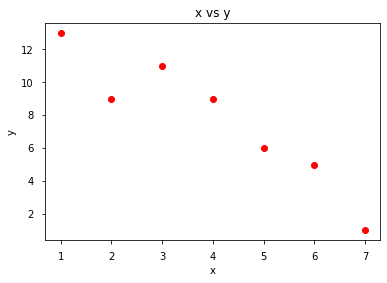

In [ ]:
X = np.array([1,2,3,4,5,6,7])

Y = np.array([13,9,11,9,6,5,1])

plt.plot(X,Y, 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')
plt.show()

As we can see, if we were to fit the most accurate line possible to this data, it would not pass through the origin. 

##Question 10(c)

We implement our answer from part (a) into the heights_weights.py code

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Model 1 relative error: 0.06576974097275647
Model 2 relative error: 0.06372174112789745


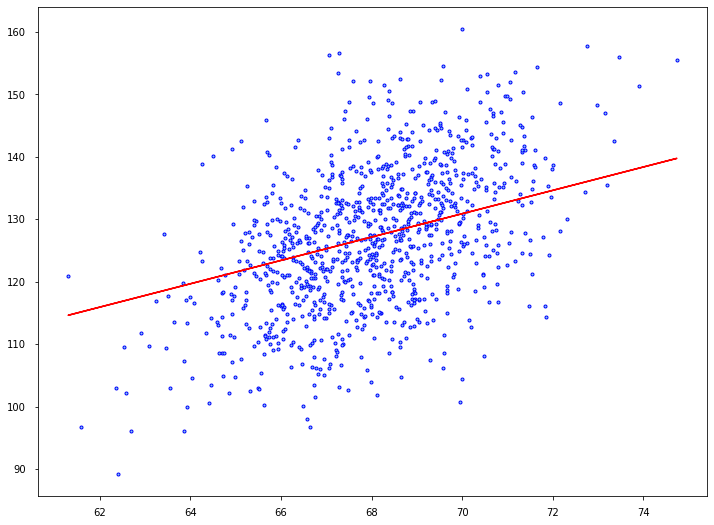

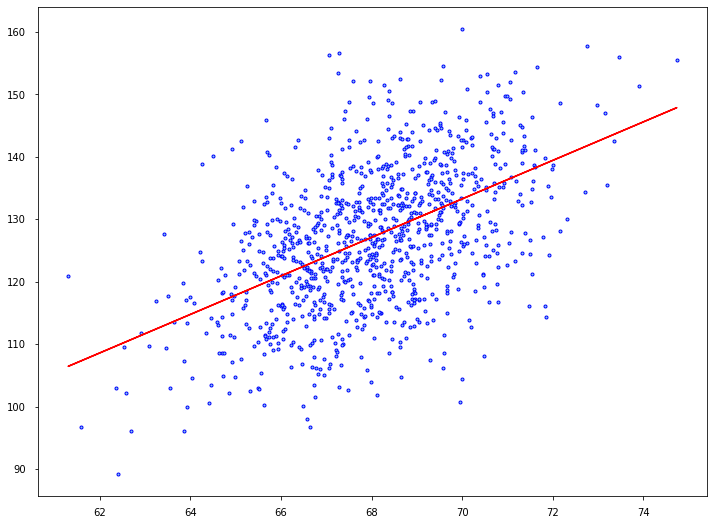

In [ ]:
plt.close("all")
plt.rcParams['xtick.major.pad']='8'
plt.rcParams['ytick.major.pad']='8'

### CHANGE PATH TO WHEREVER YOU SAVE THE DATA FILES ### 
data = np.loadtxt("heights_weights.txt") 

n_train = 20000
n_test = 1000

# Randomly select training, test and validation sets
np.random.shuffle(data)
data_train = data[range(n_train),:]
data_test = data[range(n_train, n_train+n_test),:]
heights_train = data_train[:,1]
weights_train = data_train[:,2]
heights_test = data_test[:,1]
weights_test = data_test[:,2]

### INSERT CODE HERE ###
# Hint: To fit model 1 use the expression you found directly
# to fit model 2 you can use np.linalg.lstsq

x_hat = (np.dot(heights_train, weights_train))/(np.linalg.norm(heights_train))**2

weights_train_fixed = weights_train.reshape(-1,1)

new_heights_train = np.vstack([heights_train, np.ones(len(heights_train))]).transpose()

y_1_hat, y_0_hat= np.linalg.lstsq(new_heights_train, weights_train_fixed)[0]

y_1_hat = float(y_1_hat)
y_0_hat = float(y_0_hat)


pred_model_1 = x_hat*heights_test

pred_model_2 = y_1_hat*heights_test + y_0_hat



plt.figure(figsize=(12, 9))  
plt.plot(heights_test, weights_test, '.',  color='skyblue',markeredgecolor='blue')
plt.plot(heights_test, pred_model_1,  c="red")

plt.figure(figsize=(12, 9))  
plt.plot(heights_test, weights_test, '.', color='skyblue',markeredgecolor='blue')
plt.plot(heights_test, pred_model_2, c="red")

error_1 = np.sum(np.abs((pred_model_1 - weights_test)/weights_test))/n_test
error_2 = np.sum(np.abs((pred_model_2 - weights_test)/weights_test))/n_test

print("Model 1 relative error: " + str(error_1))
print("Model 2 relative error: " + str(error_2))

The relative errors achieved by the two models on the test set are:

$$\text{Model 1: }0.06575478821914703$$

$$\text{Model 2: }0.06441998882804222$$

(note that these are suject to change given that the training and test datasets are randomly generated every time). 

##Question 10(d)

Below, we run the same code as in part (c) except, this time, we only train on 100 training examples:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Model 1 relative error: 0.06603136804244211
Model 2 relative error: 0.0643761181523086


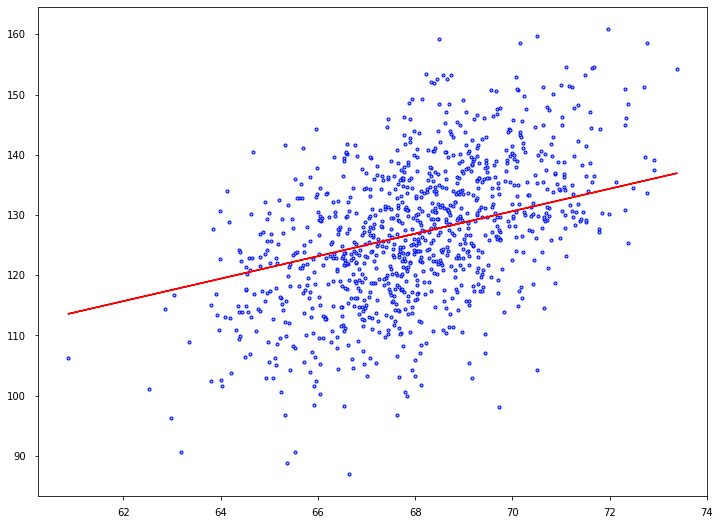

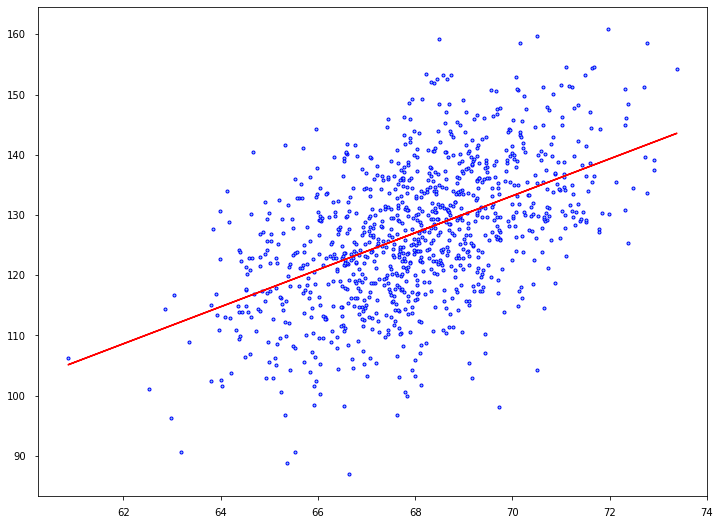

In [ ]:
plt.close("all")
plt.rcParams['xtick.major.pad']='8'
plt.rcParams['ytick.major.pad']='8'

### CHANGE PATH TO WHEREVER YOU SAVE THE DATA FILES ### 
data = np.loadtxt("heights_weights.txt") 

n_train = 100
n_test = 1000

# Randomly select training, test and validation sets
np.random.shuffle(data)
data_train = data[range(n_train),:]
data_test = data[range(n_train, n_train+n_test),:]
heights_train = data_train[:,1]
weights_train = data_train[:,2]
heights_test = data_test[:,1]
weights_test = data_test[:,2]

### INSERT CODE HERE ###
# Hint: To fit model 1 use the expression you found directly
# to fit model 2 you can use np.linalg.lstsq

x_hat = (np.dot(heights_train, weights_train))/(np.linalg.norm(heights_train))**2

weights_train_fixed = weights_train.reshape(-1,1)

new_heights_train = np.vstack([heights_train, np.ones(len(heights_train))]).transpose()

y_1_hat, y_0_hat= np.linalg.lstsq(new_heights_train, weights_train_fixed)[0]

y_1_hat = float(y_1_hat)
y_0_hat = float(y_0_hat)



pred_model_1 = x_hat*heights_test

pred_model_2 = y_1_hat*heights_test + y_0_hat





plt.figure(figsize=(12, 9))  
plt.plot(heights_test, weights_test, '.',  color='skyblue',markeredgecolor='blue')
plt.plot(heights_test, pred_model_1,  c="red")

plt.figure(figsize=(12, 9))  
plt.plot(heights_test, weights_test, '.', color='skyblue',markeredgecolor='blue')
plt.plot(heights_test, pred_model_2, c="red")

error_1 = np.sum(np.abs((pred_model_1 - weights_test)/weights_test))/n_test
error_2 = np.sum(np.abs((pred_model_2 - weights_test)/weights_test))/n_test

print("Model 1 relative error: " + str(error_1))
print("Model 2 relative error: " + str(error_2))

From the above code, I noticed that the relative error of the models doesn't really change. Despite reducing the amount of training examples down to 100, we still had about the same accuracy. This suggests that linear models work fairly consistenly no matter how much data you're working with. Linear models seem to be best for situations where data is scarce given that they maintain their accuracy even with a small amount of training examples. When data is plentiful, it would probably be more beneficial to use a higher-ordered model so that we can catpure all of the intracicies and patterns that a lower-ordered model (such as linear regresssion) cannot capture. Meanwhile, using higher ordered models in situations where there is only a small amount of training data may lead to overfitting, thus, linear models will be the way to go in these situations. 

##Question 13 (Extra Credit)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2

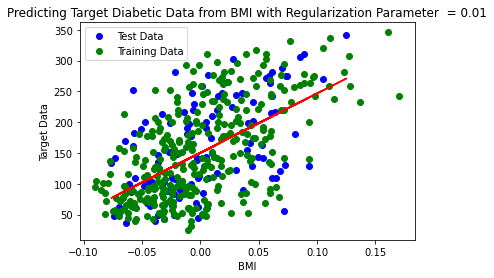

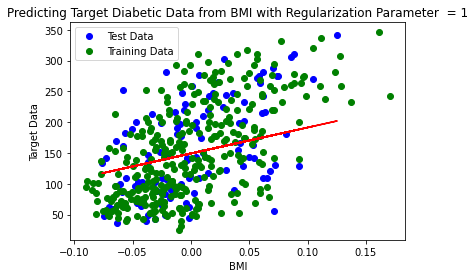

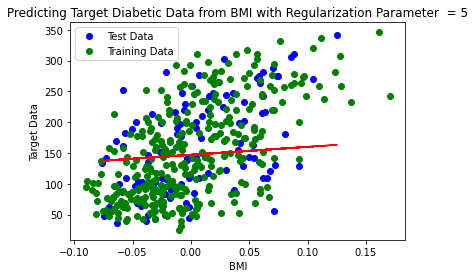

In [129]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
data_loader = load_diabetes()

def ridge_regression(X_train, X_test, y_train, alpha):
    X_train['intercept_value'] = 1 



    X_train = X_train[['intercept_value','bmi']]


    identity_matrix = np.identity(2)




    B_hat_part_1 = np.linalg.inv(np.matmul(X_train.transpose(), X_train) + alpha*identity_matrix)

    B_hat = np.matmul(np.matmul(B_hat_part_1, X_train.transpose()), y_train)

    B_hat = B_hat.to_numpy()
    X_test = X_test.to_numpy()


    ridge_model = B_hat[1]*X_test +B_hat[0]
    return ridge_model 

df = pd.DataFrame(data= np.c_[data_loader['data'], data_loader['target']],
                     columns= data_loader['feature_names'] + ['target'])


train, test = train_test_split(df, test_size=0.25)

X_train = train[['bmi']]
X_test = test[['bmi']]
y_train = train[['target']]
y_test = test[['target']]

ridge_model_1 = ridge_regression(X_train, X_test, y_train,0.01)
ridge_model_2 = ridge_regression(X_train, X_test, y_train,1)
ridge_model_3 = ridge_regression(X_train, X_test, y_train,5)

X_train_plot = X_train['bmi']




plt.plot(X_test, y_test, 'bo', label='Test Data')
plt.plot(X_train_plot, y_train, 'go', label='Training Data')
plt.plot(X_test, ridge_model_1, '-r')
plt.xlabel('BMI')
plt.ylabel('Target Data')
plt.title('Predicting Target Diabetic Data from BMI with Regularization Parameter  = 0.01')
plt.legend()
plt.show()

plt.plot(X_test, y_test, 'bo', label='Test Data')
plt.plot(X_train_plot, y_train, 'go', label='Training Data')
plt.plot(X_test, ridge_model_2, '-r')
plt.xlabel('BMI')
plt.ylabel('Target Data')
plt.title('Predicting Target Diabetic Data from BMI with Regularization Parameter  = 1')
plt.legend()
plt.show()

plt.plot(X_test, y_test, 'bo', label='Test Data')
plt.plot(X_train_plot, y_train, 'go', label='Training Data')
plt.plot(X_test, ridge_model_3, '-r')
plt.xlabel('BMI')
plt.ylabel('Target Data')
plt.title('Predicting Target Diabetic Data from BMI with Regularization Parameter  = 5')
plt.legend()
plt.show()

In [132]:
#This code is just used for saving as pdf
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain

In [133]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [137]:
!jupyter nbconvert --to PDF "Homework_2.ipynb"

[NbConvertApp] WARNING | pattern 'Homework_2.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    